<a href="https://colab.research.google.com/github/GustavoFRS/KFold/blob/main/Vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.applications import VGG19, ResNet50V2
import tensorflow_datasets as tfds
import tensorflow as tf

from keras import Sequential
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.layers import Flatten, Dense, BatchNormalization, Activation, Dropout, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix

from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image

# Helpers

In [4]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Load

In [38]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=.3, random_state=42)
"""
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)
"""

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


# VGG19

   
Training for fold 1 ...
Epoch 1/35
91/91 [==============================] - ETA: 0s - loss: 2.1967 - accuracy: 0.1877 - recall: 0.0039 - precision_m: 0.1689 - f1_m: 0.0078
Epoch 1: val_accuracy improved from -inf to 0.39805, saving model to /content/drive/MyDrive/Models/best_model_vgg.h5
91/91 [==============================] - 19s 197ms/step - loss: 2.1967 - accuracy: 0.1877 - recall: 0.0039 - precision_m: 0.1689 - f1_m: 0.0078 - val_loss: 1.7507 - val_accuracy: 0.3980 - val_recall: 0.0110 - val_precision_m: 0.7900 - val_f1_m: 0.0220
Epoch 2/35
91/91 [==============================] - ETA: 0s - loss: 1.6580 - accuracy: 0.3984 - recall: 0.1478 - precision_m: 0.5750 - f1_m: 0.2267
Epoch 2: val_accuracy improved from 0.39805 to 0.54821, saving model to /content/drive/MyDrive/Models/best_model_vgg.h5
91/91 [==============================] - 18s 192ms/step - loss: 1.6580 - accuracy: 0.3984 - recall: 0.1478 - precision_m: 0.5750 - f1_m: 0.2267 - val_loss: 1.2972 - val_accuracy: 0.5482 -

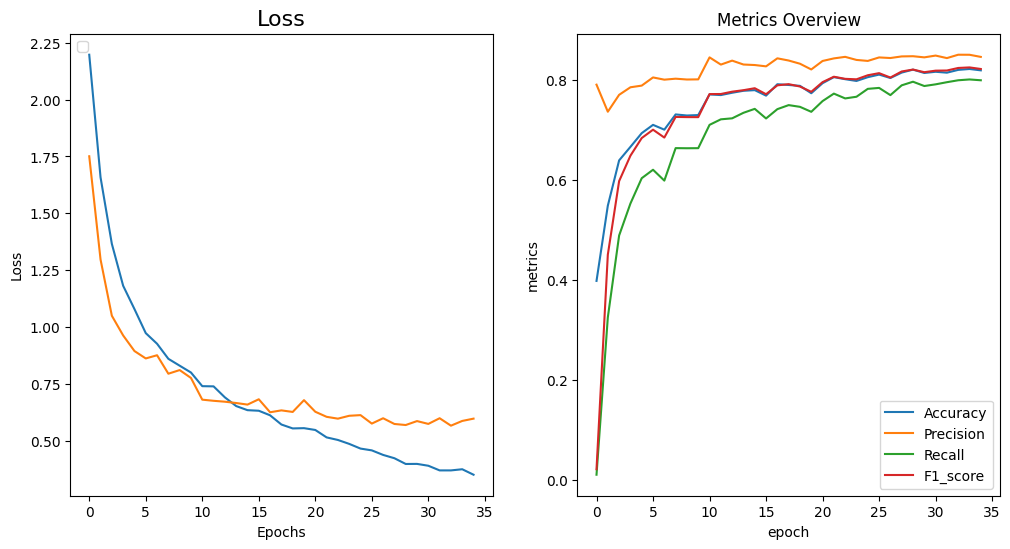

   
Training for fold 2 ...
Epoch 1/35
91/91 [==============================] - ETA: 0s - loss: 2.2056 - accuracy: 0.1745 - recall: 0.0015 - precision_m: 0.0904 - f1_m: 0.0029
Epoch 1: val_accuracy improved from -inf to 0.36230, saving model to /content/drive/MyDrive/Models/best_model_vgg.h5
91/91 [==============================] - 19s 197ms/step - loss: 2.2056 - accuracy: 0.1745 - recall: 0.0015 - precision_m: 0.0904 - f1_m: 0.0029 - val_loss: 1.8180 - val_accuracy: 0.3623 - val_recall: 0.0111 - val_precision_m: 0.4377 - val_f1_m: 0.0213
Epoch 2/35
91/91 [==============================] - ETA: 0s - loss: 1.6690 - accuracy: 0.3857 - recall: 0.1325 - precision_m: 0.5383 - f1_m: 0.2026
Epoch 2: val_accuracy improved from 0.36230 to 0.54727, saving model to /content/drive/MyDrive/Models/best_model_vgg.h5
91/91 [==============================] - 18s 197ms/step - loss: 1.6690 - accuracy: 0.3857 - recall: 0.1325 - precision_m: 0.5383 - f1_m: 0.2026 - val_loss: 1.2929 - val_accuracy: 0.5473 -

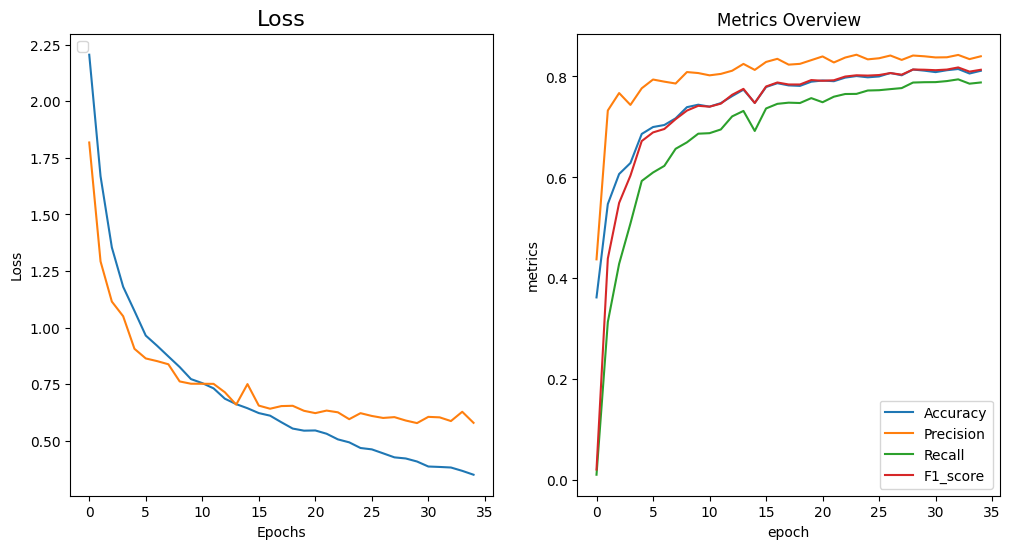

   
Training for fold 3 ...
Epoch 1/35
91/91 [==============================] - ETA: 0s - loss: 2.2347 - accuracy: 0.1643 - recall: 3.4665e-04 - precision_m: 0.0458 - f1_m: 6.8018e-04
Epoch 1: val_accuracy improved from -inf to 0.31570, saving model to /content/drive/MyDrive/Models/best_model_vgg.h5
91/91 [==============================] - 21s 214ms/step - loss: 2.2347 - accuracy: 0.1643 - recall: 3.4665e-04 - precision_m: 0.0458 - f1_m: 6.8018e-04 - val_loss: 1.9370 - val_accuracy: 0.3157 - val_recall: 8.5719e-05 - val_precision_m: 0.0217 - val_f1_m: 1.6918e-04
Epoch 2/35
91/91 [==============================] - ETA: 0s - loss: 1.7566 - accuracy: 0.3636 - recall: 0.1018 - precision_m: 0.5508 - f1_m: 0.1631
Epoch 2: val_accuracy improved from 0.31570 to 0.55537, saving model to /content/drive/MyDrive/Models/best_model_vgg.h5
91/91 [==============================] - 18s 194ms/step - loss: 1.7566 - accuracy: 0.3636 - recall: 0.1018 - precision_m: 0.5508 - f1_m: 0.1631 - val_loss: 1.3252 

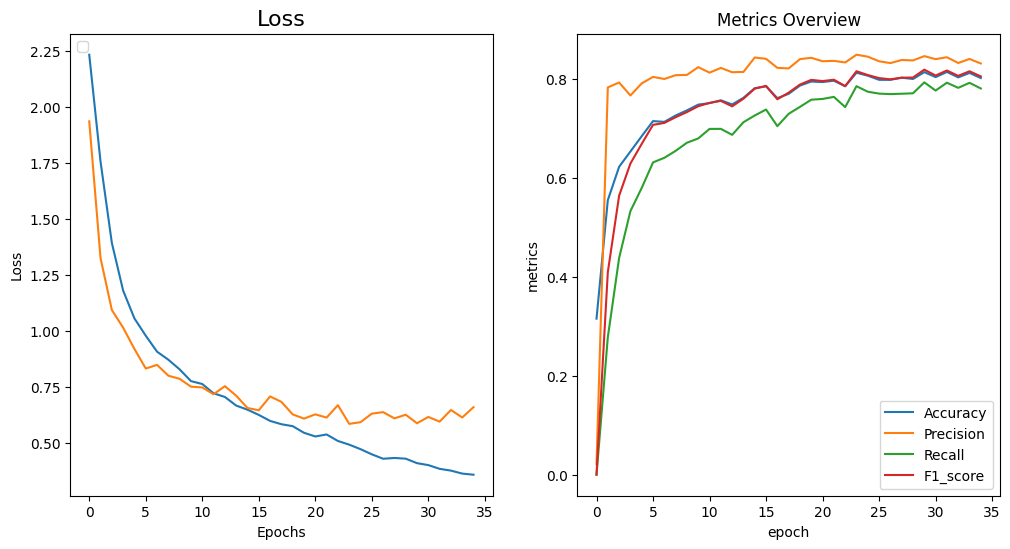

In [9]:
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the filepath to save the best model
checkpoint_filepath = '/content/drive/MyDrive/Models/best_model_vgg.h5'

cv = KFold(n_splits=3, shuffle=True, random_state=88)

fold_num = 1
for train_index, val_index in cv.split(x_train, y_train):

    base_model_vgg = VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32,3),
    classes=10
    )


    batch_size = 256
    epochs = 35

    print('   ')
    print(f'Training for fold {fold_num} ...')

    # Split the data for the current fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    x_train_fold = x_train_fold.astype('float32') / 255.0
    x_val_fold = x_val_fold.astype('float32') / 255.0

    y_train_fold = to_categorical(y_train_fold)
    y_val_fold = to_categorical(y_val_fold)

    # Build model
    model = Sequential()

    model.add(base_model_vgg)
    model.add(Flatten())

    model.add(Dense(1024,activation=('relu'),input_dim=512))
    model.add(Dense(512,activation=('relu')))
    model.add(Dropout(.3))
    model.add(Dense(256,activation=('relu')))
    # model.add(Dense(256,activation=('relu')))
    model.add(Dropout(.3))

    model.add(Dense(128,activation=('relu')))
    model.add(Dropout(.2))
    model.add(Dense(10, activation=('softmax')))

    sgd=SGD(learning_rate=0.001,momentum=.9)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy', "Recall", precision_m, f1_m])

    # Data augmentation generators
    train_datagen = ImageDataGenerator(rotation_range=15, horizontal_flip=True, zoom_range=.1)
    val_datagen = ImageDataGenerator(rotation_range=15, horizontal_flip=True, zoom_range=.1)

    # Apply data augmentation to training and validation sets
    train_generator = train_datagen.flow(x_train_fold, y_train_fold, batch_size=batch_size)
    val_generator = val_datagen.flow(x_val_fold, y_val_fold, batch_size=batch_size)



    # Define the ModelCheckpoint callback
    checkpoint = ModelCheckpoint(
        checkpoint_filepath,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1
    )
    # Train the model on the current fold
    hist = model.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch=x_train_fold.shape[0] // batch_size,
        validation_data=val_generator,
        callbacks=[checkpoint]
    )

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(hist.history['loss'])
    ax1.plot(hist.history['val_loss'])
    ax1.set_title('Loss', fontsize=16)
    ax1.set_xlabel('Epochs')
    #ax1.set_xticks(range(epochs))
    ax1.set_ylabel('Loss')
    ax1.legend(loc='upper left')

    ax2.plot(hist.history['val_accuracy'])
    ax2.plot(hist.history['val_precision_m'])
    ax2.plot(hist.history['val_recall'])
    ax2.plot(hist.history['val_f1_m'])

    ax2.set_title('Metrics Overview')
    ax2.set_ylabel('metrics')
    ax2.set_xlabel('epoch')
    ax2.legend(['Accuracy', 'Precision', 'Recall', 'F1_score'], loc='lower right')
    plt.show()

    # Increase fold number
    fold_num += 1

# Metrics Report

In [39]:
y_test=to_categorical(y_test)

In [40]:
from sklearn.metrics import classification_report
from tensorflow.keras.utils import get_custom_objects
import numpy as np

# Register the custom metric function
get_custom_objects().update({"precision_m": precision_m})
get_custom_objects().update({"f1_m": precision_m})

# Load the best model
best_model_vgg = tf.keras.models.load_model('/content/drive/MyDrive/Models/best_model_vgg.h5')

all_prediction = best_model_vgg.predict(x_test, batch_size=256)
predicted_labels = [np.argmax(pred) for pred in all_prediction]
y_pred = [np.argmax(i) for i in y_test]

print(classification_report(y_pred, predicted_labels, zero_division=0))

40/40 [==============================] - 1s 31ms/step
              precision    recall  f1-score   support

           0       0.59      0.88      0.71      1000
           1       0.69      0.94      0.80      1000
           2       0.61      0.78      0.69      1000
           3       0.67      0.32      0.43      1000
           4       0.95      0.31      0.47      1000
           5       0.55      0.75      0.63      1000
           6       0.86      0.69      0.76      1000
           7       0.71      0.81      0.76      1000
           8       0.91      0.77      0.84      1000
           9       0.86      0.80      0.83      1000

    accuracy                           0.71     10000
   macro avg       0.74      0.71      0.69     10000
weighted avg       0.74      0.71      0.69     10000

